<a href="https://colab.research.google.com/github/Manu021108/Bharat-Intern/blob/main/Copy_of_SMS_SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import pandas as pd
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='/content/sms_spam.csv'
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding:{encoding}" )
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding :{encoding}")
        continue
if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed.unable to read the csv file")


file successfully read with encoding:utf-8
CSV file has been successfully loaded


In [ ]:
df.sample(5)

,type,text
636,ham,Yo! Howz u? girls never rang after india. L
2449,ham,What class of # reunion?
2304,ham,Lol I have to take it. member how I said my au...
4280,ham,G.W.R
4946,ham,U attend ur driving lesson how many times a wk...


In [ ]:
df.shape

(5559, 2)

In [ ]:
#1.data cleaning
df.info

<bound method DataFrame.info of       type                                               text
0      ham  Hope you are having a good week. Just checking in
1      ham                            K..give back my thanks.
2      ham        Am also doing in cbe only. But have to pay.
3     spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4     spam  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5554   ham  You are a great role model. You are giving so ...
5555   ham  Awesome, I remember the last time we got someb...
5556  spam  If you don't, your prize will go to another cu...
5557  spam  SMS. ac JSco: Energy is high, but u may not kn...
5558   ham                    Shall call now dear having food

[5559 rows x 2 columns]>

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['type']=encoder.fit_transform(df['type'])

In [ ]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [ ]:
#missing values
df.isnull().sum()

type    0
text    0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5156, 2)

In [ ]:
#EDA
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [ ]:
df['type'].value_counts()


0    4503
1     653
Name: type, dtype: int64

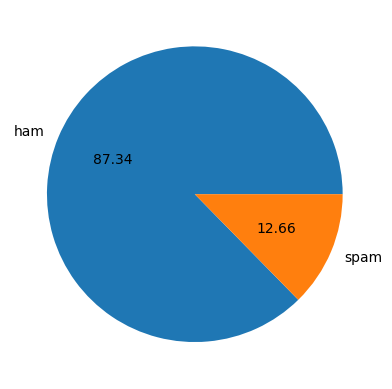

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#big chunck of ham and very less spam so outdata is not balanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

<ipython-input-26-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [ ]:
df.head()

,type,text,num_characters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [ ]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

<ipython-input-28-626f06aa4473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count


In [ ]:
df.head()

,type,text,num_characters,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #count sentences

<ipython-input-30-051a3fd7c231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #count sentences


In [ ]:
df.head()

,type,text,num_characters,num_words,num_sentences
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


In [ ]:
#targeting ham
df[df['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4503.000000,4503.000000,4503.000000
mean,70.104375,16.789252,1.827226
std,55.626601,12.810142,1.393931
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [ ]:
#targeting spam
df[df['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.649311,27.724349,2.986217
std,29.825481,6.988639,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

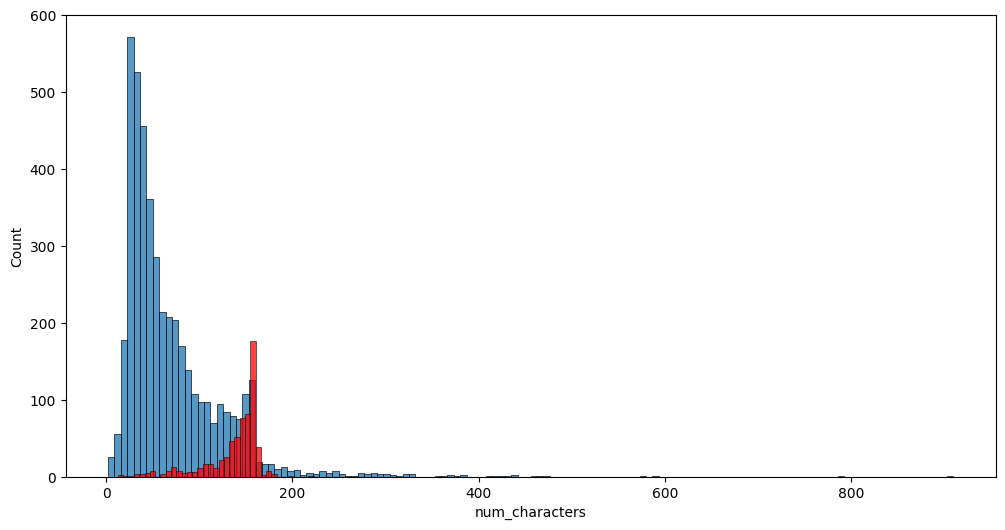

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

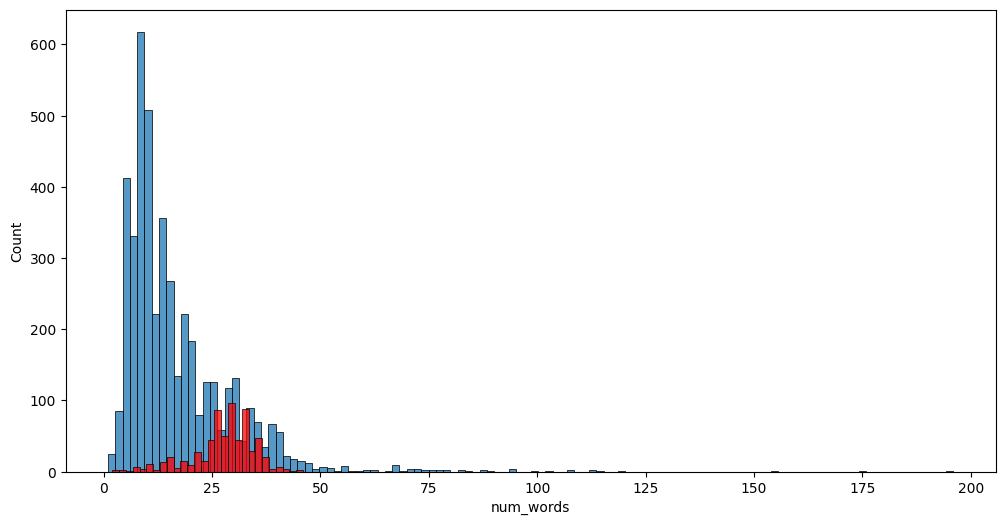

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_words'])
sns.histplot(df[df['type']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

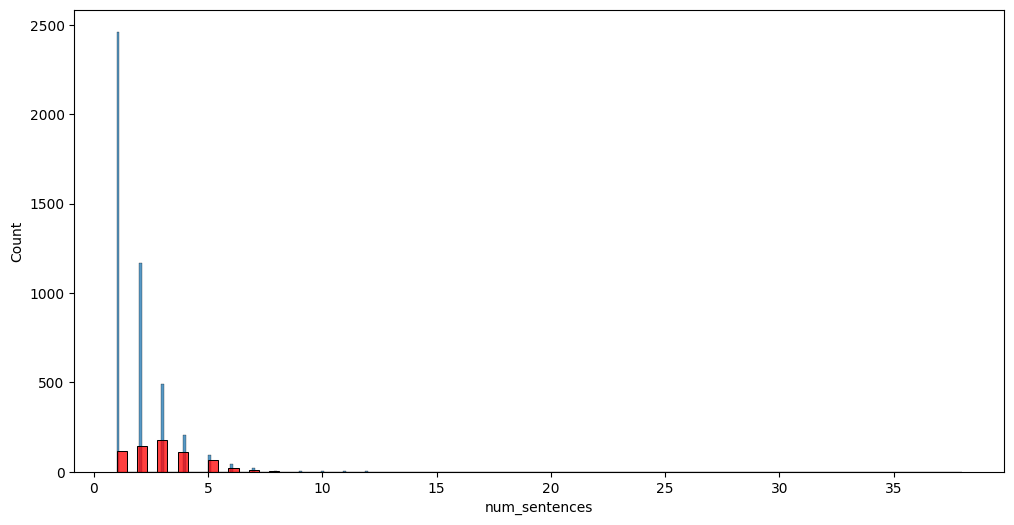

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']==0]['num_sentences'])
sns.histplot(df[df['type']==1]['num_sentences'],color='red')

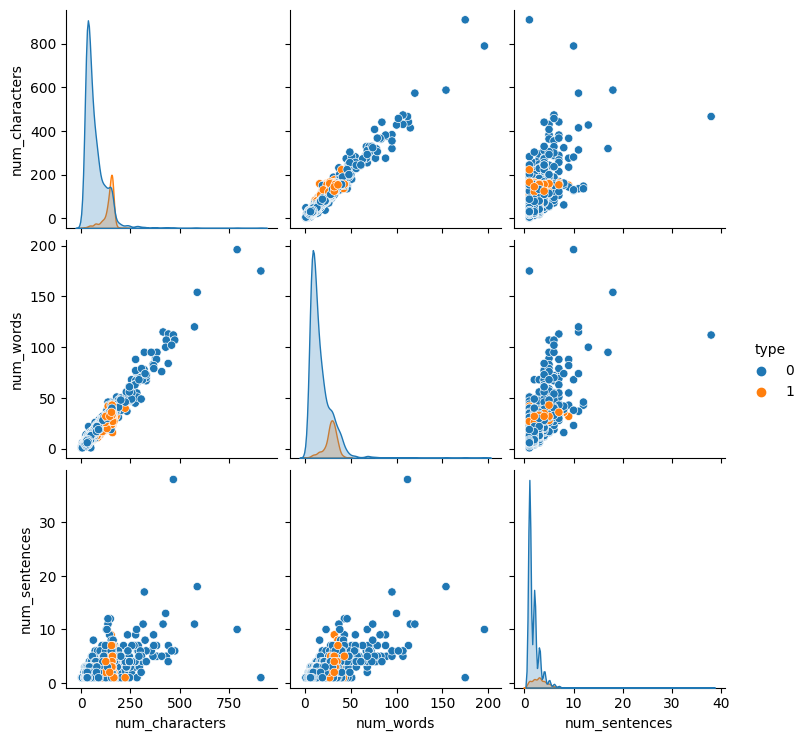

In [ ]:
sns.pairplot(df,hue='type')

In [ ]:
#data preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return "".join(i)
transformed_text=transform_text("am gonna be home soon and i dont want to talk aboutb this stuff anymore tonight, k? i have cried enough today.")
print(transformed_text)

today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text'][10]

'Sure thing big man. i have hockey elections at 6, shouldn€˜t go on longer than an hour though'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

<ipython-input-41-524e99cd07c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


In [ ]:
df.head()

,type,text,num_characters,num_words,num_sentences,transform_text
0,0,Hope you are having a good week. Just checking in,49,11,2,checking
1,0,K..give back my thanks.,23,7,1,thanks
2,0,Am also doing in cbe only. But have to pay.,43,12,2,pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,lose
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,150ppm


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc=wc.generate(df[df['type']==1]['transform_text'].str.cat(sep=" "))

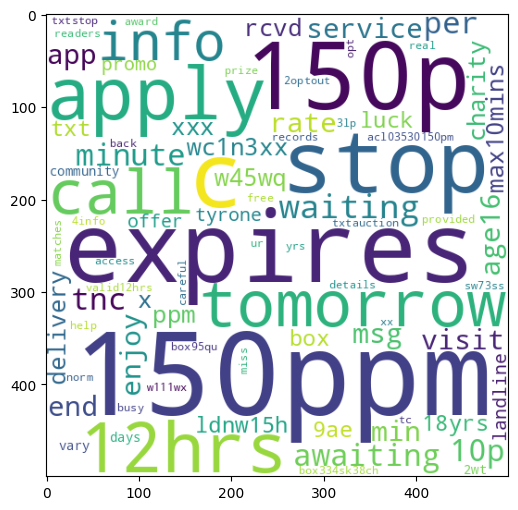

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['type']==1]['transform_text'].str.cat(sep=" "))

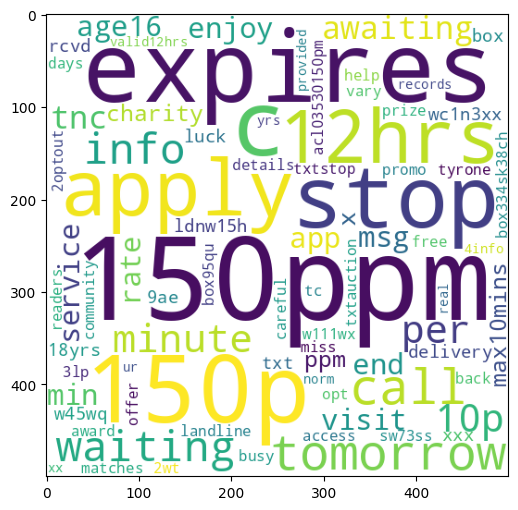

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,type,text,num_characters,num_words,num_sentences,transform_text
0,0,Hope you are having a good week. Just checking in,49,11,2,checking
1,0,K..give back my thanks.,23,7,1,thanks
2,0,Am also doing in cbe only. But have to pay.,43,12,2,pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,lose
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,150ppm


In [ ]:
spam_corpus=[]
for msg in df[df['type']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [ ]:
len(spam_corpus)

653

In [ ]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

BUILDING THE MODEL

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
X.shape

(5156, 2135)

In [ ]:
y=df['type'].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6036821705426356
[[498 398]
 [ 11 125]]
0.2390057361376673


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6036821705426356
[[498 398]
 [ 11 125]]
0.2390057361376673


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6036821705426356
[[498 398]
 [ 11 125]]
0.2390057361376673


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
